## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


In [244]:
#Importing all the necessary modules
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [245]:
# Using the sep parameter = ; to read the CSV file in structured format

student = pd.read_csv("students-data.csv", sep=';')

In [246]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [247]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [248]:
# Checking the unique values for each column into dataset
for col in student.columns:
    print(col, ":", student[col].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
age : [18 17 15 16 19 22 20 21]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [4 1 3 2 0]
Fedu : [4 1 2 3 0]
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
traveltime : [2 1 3 4]
studytime : [2 3 1 4]
failures : [0 3 2 1]
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']
famrel : [4 5 3 1 2]
freetime : [3 2 4 1 5]
goout : [4 3 2 1 5]
Dalc : [1 2 5 3 4]
Walc : [1 3 2 4 5]
health : [3 5 1 2 4]
absences : [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 : [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 : [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 : [ 6 10 15 11 19 

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [249]:
# There are No Missing Values observed into the dataset
student.index.names = ['number']
student.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [250]:
#student.select_dtypes(include=object) 

#Or

student.select_dtypes(exclude=np.number).head(2)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [251]:
# student.select_dtypes(exclude=object).var()

# Or

student.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [252]:
#student.select_dtypes(exclude=object).var() < 1

# Or

student.var() < 1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [253]:
# This code will drop the columns where variance is less thean 1
student.drop(student.var()[student.var() < 1].index.values, axis=1, inplace=True)

In [254]:
# Lets check if low variance columns are deleted
student.var() < 1

age         False
Medu        False
Fedu        False
goout       False
Walc        False
health      False
absences    False
G1          False
G2          False
G3          False
dtype: bool

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [255]:
# we can either do it for entire dataframe or passing the specific column names

from sklearn.preprocessing import LabelEncoder
student = student.apply(LabelEncoder().fit_transform)

student.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
348,0,0,2,1,0,1,4,3,1,2,...,1,1,1,2,2,3,0,10,12,12
349,1,1,3,0,0,1,3,2,2,2,...,1,1,0,4,4,4,10,8,10,10
55,0,0,1,1,0,0,2,1,2,2,...,1,1,1,3,0,1,8,5,6,7
19,0,1,1,1,1,1,4,3,1,2,...,1,1,0,2,2,4,4,5,7,7
320,0,0,2,1,0,0,4,3,3,3,...,1,1,1,1,1,4,23,10,10,10


In [256]:
# Lets see if above method has converted the obj types from object to numeric
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [257]:
# Storing the Grades into new columns
student['G1_Grade'] = pd.DataFrame(np.where(student['G1'] >= 10, 1, 0))
student['G2_Grade'] = pd.DataFrame(np.where(student['G2'] >= 10, 1, 0))
student['G3_Grade'] = pd.DataFrame(np.where(student['G3'] >= 10, 1, 0))

# Droping the base columns
student.drop(columns=['G1','G2','G3'], inplace=True)
student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1_Grade,G2_Grade,G3_Grade
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [258]:
x = student.drop(['G3_Grade'],axis=1)
y = student[['G3_Grade']]

print(x.shape)
print(y.shape)

(395, 26)
(395, 1)


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [259]:
student[['G1_Grade','G2_Grade','G3_Grade']].corr()

,G1_Grade,G2_Grade,G3_Grade
G1_Grade,1.000000,0.739432,0.730147
G2_Grade,0.739432,1.000000,0.896648
G3_Grade,0.730147,0.896648,1.000000



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Student Count as per School:


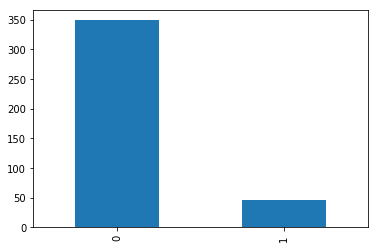

In [260]:
print("Student Count as per School:")

pd.value_counts(student["school"]).plot(kind="bar")
plt.show()

School Plot:


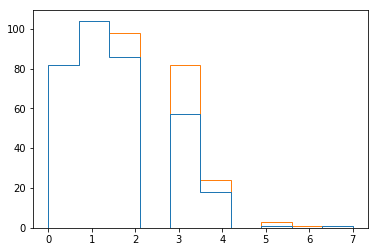

In [261]:
print("School Plot:")

histdata = [student['age'][student['school'] == school] for school in [0,1]]
plt.hist(histdata, histtype='step', stacked=True)
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=300, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95, 26)
(300, 26)
(95, 1)
(300, 1)


test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, otherwise it will complement
    the specified ``train_size``.

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [263]:
from sklearn.linear_model import LogisticRegression
# Fit the model on 30%

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [264]:
# Print Training and Testing accuracy

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy : ", model.score(x_test, y_test))

Training Accuracy:  0.968421052631579
Testing Accuracy :  0.92


In [265]:
# Print Training and Testing F1 Scores
# F1 Score = 2 * (precision * recall) / (precision + recall)
# First calculate precision and recall scores then

from sklearn.metrics import precision_score
# TP / (TP + FP)

precission_train = precision_score(y_train, model.predict(x_train))
precission_test  = precision_score(y_test, model.predict(x_test))

print('\nPrecision Score Train Data:', precission_train)
print('Precision Score Train Data:', precission_test)

from sklearn.metrics import recall_score
# TP / (TP + FN)

recall_train = recall_score(y_train, model.predict(x_train))
recall_test  = recall_score(y_test, model.predict(x_test))

print('\nRecall Score Train Data:', recall_train)
print('Recall Score Train Data:', recall_test)


Precision Score Train Data: 1.0
Precision Score Train Data: 0.8631578947368421

Recall Score Train Data: 0.9210526315789473
Recall Score Train Data: 0.8817204301075269


In [266]:
F1_Train = 2 * (precission_train * recall_train) / (precission_train + recall_train)
F1_Test  = 2 * (precission_test * recall_test) / (precission_test + recall_test)

print('Calculated F1_Train:', F1_Train)
print('Calculated F1_Test :', F1_Test)

# We can do the same using inbuilt function f1_score

from sklearn.metrics import f1_score

print('\nF1 Score Train Data:', f1_score(y_train, model.predict(x_train)))
print('F1 Score Test Data :', f1_score(y_test, model.predict(x_test)))


Calculated F1_Train: 0.958904109589041
Calculated F1_Test : 0.8723404255319148

F1 Score Train Data: 0.958904109589041
F1 Score Test Data : 0.8723404255319148


In [267]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, model.predict(x_test)))


Confusion Matrix:
[[194  13]
 [ 11  82]]


# Naive bayes with Iris data

### Import Iris.csv

In [268]:
iris = pd.read_csv("iris.csv")

In [269]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
10,11,5.4,3.7,1.5,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica


In [270]:
# Dropping ID column as it is not helpful for any calculations
iris.drop(['Id'], axis=1, inplace=True)

In [271]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,150.000000,150.000000,151.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.825314,0.433594,1.764420,0.762185
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [272]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [273]:
# First Label Encoding the Species column
iris = iris.apply(LabelEncoder().fit_transform)

In [274]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,6,10,5,0,0
41,2,2,3,2,0
123,20,6,25,14,2
108,24,4,34,14,2
17,8,14,4,2,0


In [275]:
x = iris.drop(['Species'],axis=1)
y = iris[['Species']]

print(x.shape)
print(y.shape)

(152, 4)
(152, 1)


### Find the distribution of target variable (Class)

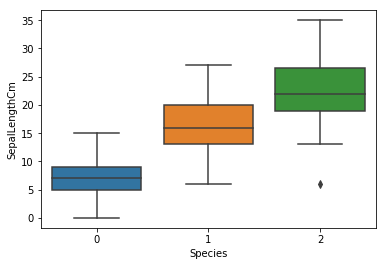

In [276]:
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.show()

From above Plot we can conclude: SepalLengthCm is useful feature in identification of Species

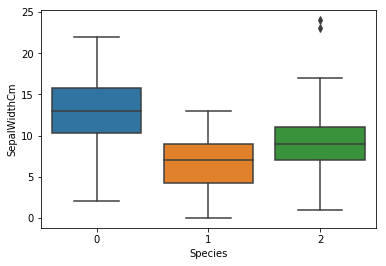

In [277]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.show()

From above Plot we can conclude: SepalWidthCm is not great distinguisher for Species identification

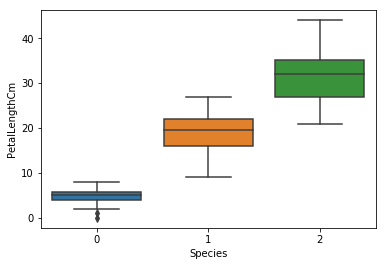

In [278]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

From above Plot we can conclude: PetalLengthCm is useful feature in identification of Species

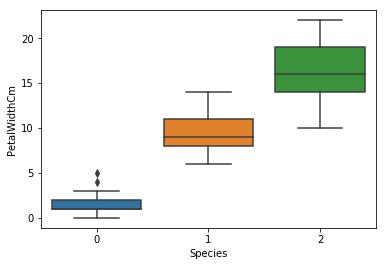

In [279]:
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
plt.show()

From above Plot we can conclude: PetalWidthCm is useful feature in identification of Species

### Plot the distribution of target variable using histogram

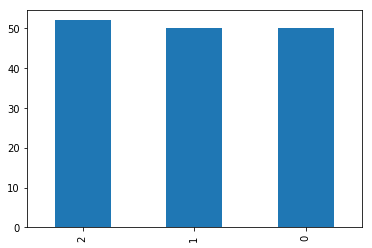

In [280]:
pd.value_counts(iris["Species"]).plot(kind="bar")
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

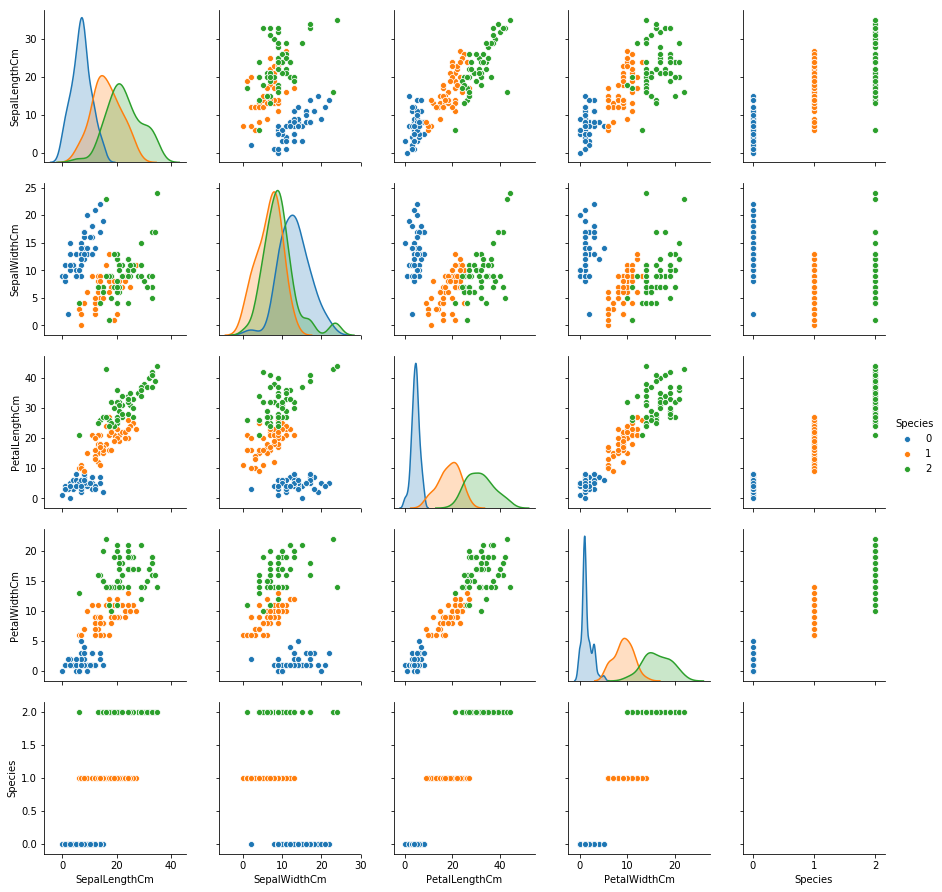

In [281]:
sns.pairplot(iris, hue="Species")

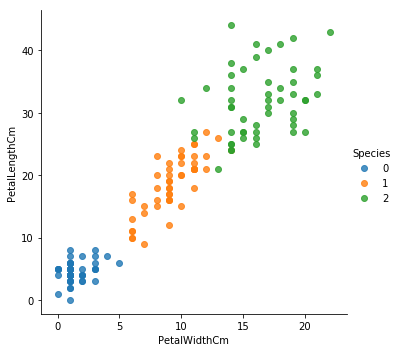

In [282]:
sns.lmplot('PetalWidthCm','PetalLengthCm', data=iris, hue='Species', fit_reg = False)
plt.show()

### Summary Statistics and explain insights for at least 2 variables

1. Petal Length & Petal Width are good variables for classification, it can help in identifying species 0
2. Sepal Width is not that much helpful for classification

### Correlation among all variables and give your insights

In [283]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.055830,0.889417,0.803838,0.782870
SepalWidthCm,-0.055830,1.000000,-0.192929,-0.216749,-0.341843
PetalLengthCm,0.889417,-0.192929,1.000000,0.940740,0.935728
PetalWidthCm,0.803838,-0.216749,0.940740,1.000000,0.946214
Species,0.782870,-0.341843,0.935728,0.946214,1.000000


1. High Corelation - Petal Length Vs Sepal Length
2. High Corelation - Petal Width Vs Sepal Length
3. High Corelation - Petal Length Vs Petal Width

### Split data in Training and Validation in 80:20

In [284]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 4)
(31, 4)
(121, 1)
(31, 1)


### Do Feature Scaling

In [285]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Train and Fit NaiveBayes Model

In [286]:
# make predictions
expected = y_test
predicted = model.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [287]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        31
   macro avg       0.96      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



In [288]:
# Print Training and Testing accuracy

print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy : ", model.score(x_test, y_test))

Training Accuracy:  0.9669421487603306
Testing Accuracy :  0.967741935483871


In [289]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, model.predict(x_test)))


Confusion Matrix:
[[10  0  0]
 [ 0  8  0]
 [ 0  1 12]]
